<h6>Fall 2021 - CPSC 483-02<br>
Project 2 - <br>
Sean Javiya <br>
Jake Wong <br>
</h6>
In Project 1 - Anomaly Detection, we were given a dataset containing a list of students and their Zoom attendance over a 5 week course.<br>We performed various statistical tests on the data, in order to develop a function that will parse the provided dataset and output a list of students who were tardy or under-attended.<br>We developed two functions using different statistical methods of detecting anomalies in the dataset.<br>We conducted an analysis on the results and determined which function was more appropriate for the given dataset.
^rewrite

<h3>Experiment 1:</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from IPython.display import Markdown as md

xvalues = np.loadtxt("dataset.csv", delimiter=",", skiprows=1, usecols=(0,1))
yvalues = np.loadtxt("dataset.csv", delimiter=",", skiprows=1, usecols=2)
randomnumber = np.random.randint(0, yvalues.size, size= int(yvalues.size/10))
print ("We are given ", yvalues.size, " rows of x_1, x_2, and y values.")
xtrain = xvalues
ytrain = yvalues
xtest1 = []
xtest2 = []
ytest = [] #10%
randomnumber[::-1].sort()
for n in randomnumber:
    xtest1.append(xvalues[n, 0])
    xtest2.append(xvalues[n, 1])
    ytest.append(yvalues[n])
    xtrain = np.delete(xtrain, n, 0)
    ytrain = np.delete(ytrain, n, 0)
xtest = np.stack((xtest1, xtest2), axis= -1)
ytest = np.asarray(ytest)
print ("We take ", ytrain.size, " rows for training.")
print ("The remaning ", ytest.size, " rows of x_1, x_2, and y_2 values are set aside for testing.")

We are given  1000  rows of x_1, x_2, and y values.
We take  900  rows for training.
The remaning  100  rows of x_1, x_2, and y_2 values are set aside for testing.


<h3>Experiment 2:</h3>

In [2]:
print (xtrain)
Xtrain = np.hstack((np.ones_like(xtrain), xtrain))
Xtrain = np.delete(Xtrain, 0, 1)
weights = np.linalg.inv(Xtrain.transpose().dot(Xtrain)).dot(Xtrain.transpose()).dot(ytrain)
print ("\nIn our linear model, our y-intercept and coefficients are: ", weights)


[[-0.59828843  0.46192254]
 [-1.74575782 -1.41239652]
 [-1.16639696 -0.06900688]
 ...
 [ 0.60744114 -2.60559204]
 [ 0.04306784 -3.45458992]
 [ 0.06279166 -0.0365992 ]]

In our linear model, our y-intercept and coefficients are:  [0.68471375 0.03837633 0.00958371]


y = b + mx<br>
y = w0  + w1 x1 + w2 x2<br>
given x1 x2 and y<br><br>
$X=\begin{bmatrix}1&x_{11}&x_{12}\\1&x_{21}&x_{22}\\1&x_{31}&x_{32}\\\vdots&\vdots&\vdots\\1&x_{n1}&x_{n2}\end{bmatrix}$<br>
$y=\begin{bmatrix}y_{0}\\y_{1}\\y_{2}\\\vdots\\y_{n}\end{bmatrix}$<br>
$w=\begin{bmatrix}w_{0}\\w_{1}\\w_{2}\end{bmatrix}$<br>

$(X^T X)^{-1} X^T y = w$<br>
$y = weights \cdot xtrain$<br>
$y = w_{0} + w_{1} * x_{1} + w_{2} * x_{2}$\
The Actual Equation:

In [3]:
md(f"$y = $ {weights[0]} $ + $ {weights[1]} $ * x_{1} + $ {weights[2]} $ * x_{2}$")

$y = $ 0.684713751439683 $ + $ 0.03837633031336 $ * x_1 + $ 0.009583708475403248 $ * x_2$

<h3>Experiment 3:</h3>

In [4]:
predicteddata = []
predictrange = ytrain.size
predictrange -= 1
while predictrange >= 0:
    prediction = weights[0] * Xtrain[predictrange,0] + weights[1] * Xtrain[predictrange, 1] + weights[2] * Xtrain[predictrange, 2]
    predicteddata.append(prediction)
    predictrange -= 1
    
predicteddata[::-1].sort()
predictrange = ytrain.size
predictrange -= 1
linearsquaredloss = 0
while predictrange >= 0:
    linearsquaredloss += (ytrain[predictrange] - predicteddata[predictrange])**2
    predictrange -=1
linearsquaredloss = linearsquaredloss / ytrain.size
print ("The MSE, or average squared loss, of our linear model is ", linearsquaredloss)

The MSE, or average squared loss, of our linear model is  8.64602602123685


<h3>Experiment 4:</h3>

In [5]:
Xquadratic = np.hstack((np.ones_like(xtrain), xtrain, xtrain**2))
Xquadratic = np.delete(Xquadratic, 0, 1)
quadweights = np.linalg.inv(Xquadratic.transpose().dot(Xquadratic)).dot(Xquadratic.transpose()).dot(ytrain)
print("In our quadratic model, our y-intercept and coefficients are: \n", quadweights, "\n")
quadpredicteddata = []
predictrange = ytrain.size
predictrange -= 1
while predictrange >= 0:
    quadprediction = quadweights[0] * Xquadratic[predictrange, 0] + quadweights[1] * Xquadratic[predictrange, 1] + quadweights[2] *Xquadratic[predictrange, 2] + quadweights[3] * Xquadratic[predictrange, 3] + quadweights[4] * Xquadratic[predictrange, 4]
    quadpredicteddata.append(quadprediction)
    predictrange -= 1
    
predicteddata[::-1].sort()
predictrange = ytrain.size
predictrange -= 1
quadsquaredloss = 0
while predictrange >= 0:
    quadsquaredloss += (ytrain[predictrange] - quadpredicteddata[predictrange])**2
    predictrange -=1
quadsquaredloss = quadsquaredloss / ytrain.size
print ("The MSE of our quadratic model is ", quadsquaredloss)

In our quadratic model, our y-intercept and coefficients are: 
 [0.57204912 0.03671785 0.01159863 0.03842943 0.00429987] 

The MSE of our quadratic model is  8.66282854800788


$X=\begin{bmatrix}1&x_{11}&x_{12}&x_{11}^2&x_{12}^2\\1&x_{21}&x_{22}&x_{21}^2&x_{22}^2\\1&x_{31}&x_{32}&x_{31}^2&x_{32}^2\\\vdots&\vdots&\vdots&\vdots&\vdots\\1&x_{n1}&x_{n2}&x_{n1}^2&x_{n2}^2\end{bmatrix}$<br>
$y=\begin{bmatrix}y_{0}\\y_{1}\\y_{2}\\\vdots\\y_{n}\end{bmatrix}$<br>
$w=\begin{bmatrix}w_{0}\\w_{1}\\w_{2}\\w_{3}\\w_{4}\end{bmatrix}$<br>
$(X^T X)^{-1} X^T y = w$<br>
equation is $y = w_{0} + w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{1}^2 + w_{4}x_{2}^2$

In [6]:
md(f"The actual Equation:<br>$y = $ {quadweights[0]} $ + ${quadweights[1]}$ * x_{1} + ${quadweights[2]}$ * x_{2} + ${quadweights[3]}$ * x_{1}^2 + ${quadweights[4]}$ * x_{2}^2$")

The actual Equation:<br>$y = $ 0.5720491206073124 $ + $0.03671784725369187$ * x_1 + $0.01159863220302837$ * x_2 + $0.03842942895554087$ * x_1^2 + $0.004299874868320282$ * x_2^2$

<h3>Experiment 5:</h3>

In [7]:
Xtest = np.hstack((np.ones_like(xtest), xtest))
Xtest = np.delete(Xtest, 0, 1)
predicteddata = []
predictrange = ytest.size
predictrange -= 1
while predictrange >= 0:
    prediction = weights[0] * Xtest[predictrange,0] + weights[1] * Xtest[predictrange, 1] + weights[2] * Xtest[predictrange, 2]
    predicteddata.append(prediction)
    predictrange -= 1
    
predicteddata[::-1].sort()
predictrange = ytest.size
predictrange -= 1
lintest_squaredloss = 0
while predictrange >= 0:
    lintest_squaredloss += (ytest[predictrange] - predicteddata[predictrange])**2
    predictrange -=1
lintest_squaredloss = lintest_squaredloss / ytest.size
print ("When our linear model was applied to our test data, the MSE was ", lintest_squaredloss)

When our linear model was applied to our test data, the MSE was  7.771483627395255


<h3>Experiment 6:</h3>

In [8]:
Xquadtest = np.hstack((np.ones_like(xtest), xtest, xtest**2))
Xquadtest = np.delete(Xquadtest, 0, 1)

quadpredicteddata = []
predictrange = ytest.size
predictrange -= 1
while predictrange >= 0:
    quadprediction = quadweights[0] * Xquadtest[predictrange, 0] + quadweights[1] * Xquadtest[predictrange, 1] + quadweights[2] * Xquadtest[predictrange, 2] + quadweights[3] * Xquadtest[predictrange, 3] + quadweights[4] * Xquadtest[predictrange, 4]
    quadpredicteddata.append(quadprediction)
    predictrange -= 1
    
predicteddata[::-1].sort()
predictrange = ytest.size
predictrange -= 1
quadtest_squaredloss = 0
while predictrange >= 0:
    quadtest_squaredloss += (ytest[predictrange] - quadpredicteddata[predictrange])**2
    predictrange -=1
quadtest_squaredloss = quadtest_squaredloss / ytest.size
print ("When our quadratic model was applied to our test data, the MSE was ", quadtest_squaredloss)


When our quadratic model was applied to our test data, the MSE was  7.825519692815401


about the same

<h3>Experiment 7 & 8:</h3>

MSE by Model Order


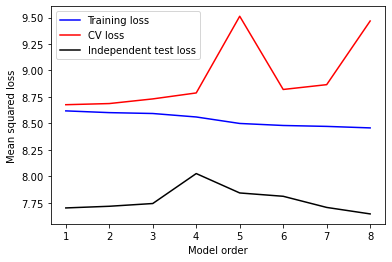

In [9]:
max_order = 8
K = 5
cv_loss = np.zeros((K,max_order+1))
ind_loss = np.zeros((K,max_order+1))
train_loss = np.zeros((K,max_order+1))
fold_weights = np.zeros((K,max_order+1,max_order*2+1))

x_train = xtrain
x_ktest = xtest 

for k in range(max_order+1)[1:]:
    for fold in range(K):
        y_fold = ytrain[fold*180 : (fold+1)*180]
        y_train = np.delete(ytrain, (range(fold*180, (fold+1)*180)))
        
        X_fold = x_train[fold*180 : (fold+1)*180, : ]
        X_fold = np.hstack((np.ones_like(y_fold)[:, np.newaxis], X_fold))
        
        X_train = np.delete(x_train, (range(fold*180, (fold+1)*180)), 0)
        X_train = np.hstack((np.ones_like(y_train)[:, np.newaxis], X_train))
        
        x_test = np.hstack((np.ones_like(ytest)[:, np.newaxis], x_ktest))
        
        wfold = np.linalg.solve(np.dot(X_train.T,X_train),np.dot(X_train.T,y_train))
        
        indpred = np.dot(x_test,wfold)
        foldpred = np.dot(X_fold,wfold)
        trainpred = np.dot(X_train,wfold)
        
        cv_loss[fold,k] = ((foldpred - y_fold)**2).mean()
        ind_loss[fold,k] = ((indpred - ytest)**2).mean()
        train_loss[fold,k] = ((trainpred - y_train)**2).mean()
        #fold_weights[(k-1)*(max_order*2+1):(k*max_order*2+1),k,fold] = wfold
        fold_weights[fold,k,:k*2+1]= wfold
    x_train = np.hstack((x_train,xtrain**(k+1)))
    x_ktest = np.hstack((x_ktest,xtest**(k+1)))    

order = np.arange(max_order+1)
plt.plot(order[1:],train_loss.mean(axis=0)[1:],'b-',label="Training loss")
plt.plot(order[1:],cv_loss.mean(axis=0)[1:],'r-',label="CV loss")
plt.plot(order[1:],ind_loss.mean(axis=0)[1:],'k',label="Independent test loss")
plt.legend()
plt.xlabel('Model order')
plt.ylabel('Mean squared loss')
print("MSE by Model Order")


around 7, it starts to overfit
(1, x1, x2, ... x1^7, x2^7) dot product with wfold


In [23]:
print("When our 5th order polynomial is applied to the test data, the average MSE across our \n5-fold cross validation is:")
print (ind_loss[:,5].mean())
print("\nWhen our 5th order polynomial is applied to the cross-validation data, the average MSE across our \n5-fold cross validation is:")
print (cv_loss[:,5].mean())

print ("\n\nSometimes it may appear that 4th and 6th order polynomials are more appropriate. \nThis is due to random sampling for train-test split.")
print("\nWhen our 4th order polynomial is applied to the test data, the average MSE across our 5-fold cross validation is:")
print (ind_loss[:,4].mean())
print("\nWhen our 6th order polynomial is applied to the test data, the average MSE across our 5 fold cross validation is:")
print (ind_loss[:,6].mean())

print("\nThe 5 sets of y-intercept and coefficients for the 5th order polynomial models generated during \ncross-validation are:\n")
desired_order = 5
print(fold_weights[:,desired_order,:desired_order*2+1])

print("\nThe 5 equations for the order of 5 are:")
md(f"$y = $ {fold_weights[0][5][0]} $ + ${fold_weights[0][5][1]}$ * x_{1} + ${fold_weights[0][5][2]}$ * x_{2} + ${fold_weights[0][5][3]}$ * x_{1}^2 + ${fold_weights[0][5][4]}$ * x_{2}^2 + ${fold_weights[0][5][5]}$ * x_{1}^3 + ${fold_weights[0][5][6]}$ * x_{2}^3 + ${fold_weights[0][5][7]}$ * x_{1}^4 + ${fold_weights[0][5][8]}$ * x_{2}^4 + ${fold_weights[0][5][9]}$ * x_{1}^2 + ${fold_weights[0][5][10]}$ * x_{2}^5$<br> $y = $ {fold_weights[1][4][0]} $ + ${fold_weights[1][5][1]}$ * x_{1} + ${fold_weights[1][5][2]}$ * x_{2} + ${fold_weights[1][5][3]}$ * x_{1}^2 + ${fold_weights[1][5][4]}$ * x_{2}^2 + ${fold_weights[1][5][5]}$ * x_{1}^3 + ${fold_weights[1][5][6]}$ * x_{2}^3 + ${fold_weights[1][5][7]}$ * x_{1}^4 + ${fold_weights[1][5][8]}$ * x_{2}^4 + ${fold_weights[1][5][9]}$ * x_{1}^2 + ${fold_weights[1][5][10]}$ * x_{2}^5$<br> $y = $ {fold_weights[2][4][0]} $ + ${fold_weights[2][5][1]}$ * x_{1} + ${fold_weights[2][5][2]}$ * x_{2} + ${fold_weights[2][5][3]}$ * x_{1}^2 + ${fold_weights[2][5][4]}$ * x_{2}^2 + ${fold_weights[2][5][5]}$ * x_{1}^3 + ${fold_weights[2][5][6]}$ * x_{2}^3 + ${fold_weights[2][5][7]}$ * x_{1}^4 + ${fold_weights[2][5][8]}$ * x_{2}^4 + ${fold_weights[2][5][9]}$ * x_{1}^2 + ${fold_weights[2][5][10]}$ * x_{2}^5$<br> $y = $ {fold_weights[3][4][0]} $ + ${fold_weights[3][5][1]}$ * x_{1} + ${fold_weights[3][5][2]}$ * x_{2} + ${fold_weights[3][5][3]}$ * x_{1}^2 + ${fold_weights[3][5][4]}$ * x_{2}^2 + ${fold_weights[3][5][5]}$ * x_{1}^3 + ${fold_weights[3][5][6]}$ * x_{2}^3 + ${fold_weights[3][5][7]}$ * x_{1}^4 + ${fold_weights[3][5][8]}$ * x_{2}^4 + ${fold_weights[3][5][9]}$ * x_{1}^2 + ${fold_weights[3][5][10]}$ * x_{2}^5$<br>$y = $ {fold_weights[4][4][0]} $ + ${fold_weights[4][5][1]}$ * x_{1} + ${fold_weights[4][5][2]}$ * x_{2} + ${fold_weights[4][5][3]}$ * x_{1}^2 + ${fold_weights[4][5][4]}$ * x_{2}^2 + ${fold_weights[4][5][5]}$ * x_{1}^3 + ${fold_weights[4][5][6]}$ * x_{2}^3 + ${fold_weights[4][5][7]}$ * x_{1}^4 + ${fold_weights[4][5][8]}$ * x_{2}^4 + ${fold_weights[4][5][9]}$ * x_{1}^2 + ${fold_weights[4][5][10]}$ * x_{2}^5$<br>")

When our 5th order polynomial is applied to the test data, the average MSE across our 
5-fold cross validation is:
7.843406662503464

When our 5th order polynomial is applied to the cross-validation data, the average MSE across our 
5-fold cross validation is:
9.512048309430716


Sometimes it may appear that 4th and 6th order polynomials are more appropriate. 
This is due to random sampling for train-test split.

When our 4th order polynomial is applied to the test data, the average MSE across our 5-fold cross validation is:
8.026537432579648

When our 6th order polynomial is applied to the test data, the average MSE across our 5 fold cross validation is:
7.811975745496002

The 5 sets of y-intercept and coefficients for the 5th order polynomial models generated during 
cross-validation are:

[[ 3.04698147e-01  2.11890953e-01 -1.25809564e-01  2.04686044e-01
   2.25003827e-02 -6.35964454e-02  1.93951609e-02 -1.63540551e-02
  -3.59840287e-04  3.75877917e-03 -3.84199446e-04]
 [ 4.89763560e

$y = $ 0.30469814694588027 $ + $0.21189095347387205$ * x_1 + $-0.12580956433050305$ * x_2 + $0.20468604389043887$ * x_1^2 + $0.02250038268209381$ * x_2^2 + $-0.06359644538235658$ * x_1^3 + $0.019395160864411842$ * x_2^3 + $-0.01635405512219429$ * x_1^4 + $-0.00035984028715930816$ * x_2^4 + $0.003758779170821801$ * x_1^2 + $-0.0003841994457458841$ * x_2^5$<br> $y = $ 0.5808858619273428 $ + $-0.04604338790247415$ * x_1 + $-0.1897519789828163$ * x_2 + $0.059551137703393646$ * x_1^2 + $0.058493540553875754$ * x_2^2 + $0.022307316756343305$ * x_1^3 + $0.03562832203806659$ * x_2^3 + $-0.0036375459166850224$ * x_1^4 + $-0.0025063958614230906$ * x_2^4 + $-0.0012750793000684416$ * x_1^2 + $-0.0009904368052374142$ * x_2^5$<br> $y = $ 0.5667454672369019 $ + $0.052791142663891885$ * x_1 + $-0.13073781216317668$ * x_2 + $0.1003627805729991$ * x_1^2 + $0.0130238448023434$ * x_2^2 + $-0.01714875969966549$ * x_1^3 + $0.019128048287400667$ * x_2^3 + $-0.007884175758090325$ * x_1^4 + $-0.0001271040729657006$ * x_2^4 + $0.0011239870213249545$ * x_1^2 + $-0.00038425925456782263$ * x_2^5$<br> $y = $ 0.3994132680047201 $ + $-0.010333559419522903$ * x_1 + $-0.116572229079305$ * x_2 + $0.07267151130214224$ * x_1^2 + $0.038408470869374434$ * x_2^2 + $0.0019725142866799552$ * x_1^3 + $0.01300429981456326$ * x_2^3 + $-0.0016997098781900834$ * x_1^4 + $-0.0010731298746325783$ * x_2^4 + $0.0017965760709404259$ * x_1^2 + $-0.00021860415819927788$ * x_2^5$<br>$y = $ 0.2428343800962274 $ + $-0.007021557344852119$ * x_1 + $-0.11597420946252106$ * x_2 + $0.211267706058046$ * x_1^2 + $0.03274223640041389$ * x_2^2 + $0.0008502699974034796$ * x_1^3 + $0.024235842528774816$ * x_2^3 + $-0.016266091887281075$ * x_1^4 + $-0.00042706672480609224$ * x_2^4 + $0.0005535465240596871$ * x_1^2 + $-0.0004817427757960732$ * x_2^5$<br>

Usually 5 is better. Sometimes, 4 or 6 appears better. Random split of test and train data is the cause<br>


<h3>Experiment 10:</h3>

The training data:


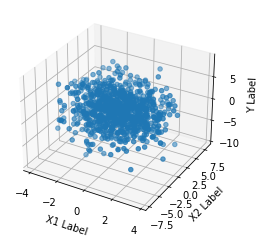

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xtrain[:,0], xtrain[:,1], ytrain)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

print ("The training data:")
plt.show()

I notice that it looks circular


<h3>Experiment 11:</h3>

The linear model:


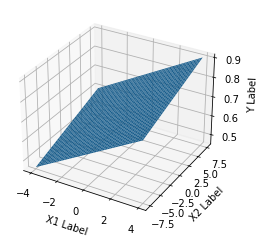

In [12]:
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
x=np.arange(-4,4,0.05)
y=np.arange(-7.5,7.5,0.05)
X,Y=np.meshgrid(x,y)
z=np.array(weights[0]+weights[1]*np.ravel(X)+weights[2]*np.ravel(Y))
Z=z.reshape(X.shape)
ax.plot_surface(X,Y,Z)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

print ("The linear model:")
plt.show()

The quadratic model:


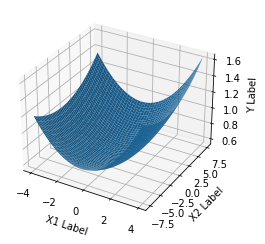

In [13]:
def quadEqu(x,y):
    return quadweights[0] + quadweights[1] * x + quadweights[2] * y + quadweights[3] * x**2 + quadweights[4] * y**2
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
x=np.arange(-4,4,0.05)
y=np.arange(-7.5,7.5,0.05)
X,Y=np.meshgrid(x,y)
z=np.array(quadEqu(np.ravel(X),np.ravel(Y)))
Z=z.reshape(X.shape)
ax.plot_surface(X,Y,Z)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

print ("The quadratic model:")
plt.show()

Our new 5th order model has an MSE of:  8.535632742875332
The y-intercept and coefficients are:  [ 4.35635274e-01  4.29913141e-02 -1.17598996e-01  1.31092053e-01
  2.23084158e-02 -1.16740319e-02  1.88026408e-02 -9.37941798e-03
 -3.84652049e-04  1.20601905e-03 -3.80679393e-04]
The 5th order model generated using the whole training set: 


Text(0.5, 0, 'Y Label')

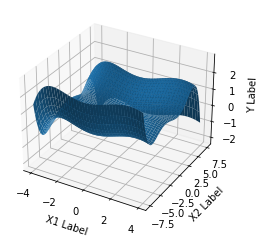

In [14]:
X_train = np.hstack((np.ones_like(ytrain)[:, np.newaxis],xtrain,xtrain**2,xtrain**3,xtrain**4,xtrain**5))
X_test = np.hstack((np.ones_like(ytest)[:, np.newaxis],xtest,xtest**2,xtest**3,xtest**4,xtest**5))
new_weights = np.linalg.solve(np.dot(X_train.T,X_train),np.dot(X_train.T,ytrain))
new_pred = np.dot(X_train,new_weights)
new_loss = ((new_pred - ytrain)**2).mean()
print ("Our new 5th order model has an MSE of: ", new_loss)
print ("The y-intercept and coefficients are: ", new_weights)
print("The 5th order model generated using the whole training set: ")
def polyEquation(x,y):
    return new_weights[0] + new_weights[1] * x + new_weights[2] * y + new_weights[3] * x**2 + new_weights[4] * y**2 + new_weights[5] * x**3 + new_weights[6] * y**3 + new_weights[7] * x**4 + new_weights[8] * y**4 + new_weights[9] * x**5 + new_weights[10] * y**5
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
x=np.arange(-4,4,0.05)
y=np.arange(-7.5,7.5,0.05)
X,Y=np.meshgrid(x,y)
z=np.array(polyEquation(np.ravel(X),np.ravel(Y)))
Z=z.reshape(X.shape)
ax.plot_surface(X,Y,Z)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

$X=\begin{bmatrix}1&x_{11}&x_{12}&x_{11}^2&x_{12}^2&\dots&x_{11}^5&x_{12}^5\\1&x_{21}&x_{22}&x_{21}^2&x_{22}^2&\dots&x_{21}^5&x_{22}^5\\1&x_{31}&x_{32}&x_{31}^2&x_{32}^2&\dots&x_{31}^5&x_{32}^5\\\vdots&\vdots&\vdots&\vdots&\vdots&\dots&\vdots&\vdots\\1&x_{n1}&x_{n2}&x_{n1}^2&x_{n2}^2&\dots&x_{n1}^5&x_{n2}^5\end{bmatrix}$<br>
$y=\begin{bmatrix}y_{0}\\y_{1}\\y_{2}\\\vdots\\y_{n}\end{bmatrix}$<br>
$w=\begin{bmatrix}w_{0}\\w_{1}\\w_{2}\\w_{3}\\\vdots\\w_{10}\end{bmatrix}$<br>
$(X^T X)^{-1} X^T y = w$<br>
The abstract equation we get for the 5th order is:<br>
$y = w_{0} + w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{1}^2 + w_{4}x_{2}^2 + w_{5}x_{1}^3 + w_{6}x_{2}^3 + w_{7}x_{1}^4 + w_{8}x_{2}^4 + w_{9}x_{1}^5 + w_{10}x_{2}^5$<br>
The Actual Equation based on the 5th order:

In [15]:
md(f"The actual Equation:<br>$y = $ {new_weights[0]} $ + ${new_weights[1]}$ * x_{1} + ${new_weights[2]}$ * x_{2} + ${new_weights[3]}$ * x_{1}^2 + ${new_weights[4]}$ * x_{2}^2 + ${new_weights[5]}$ * x_{1}^3 + ${new_weights[6]}$ * x_{2}^3 + ${new_weights[7]}$ * x_{1}^4 + ${new_weights[8]}$ * x_{2}^4 + ${new_weights[9]}$ * x_{1}^2 + ${new_weights[10]}$ * x_{2}^5$")

The actual Equation:<br>$y = $ 0.43563527381557837 $ + $0.04299131409707094$ * x_1 + $-0.11759899555391594$ * x_2 + $0.13109205298423035$ * x_1^2 + $0.022308415771377425$ * x_2^2 + $-0.011674031937530674$ * x_1^3 + $0.018802640784774834$ * x_2^3 + $-0.009379417975979364$ * x_1^4 + $-0.00038465204932964495$ * x_2^4 + $0.0012060190520035519$ * x_1^2 + $-0.00038067939284125636$ * x_2^5$

<h3>Experiment 12:</h3>

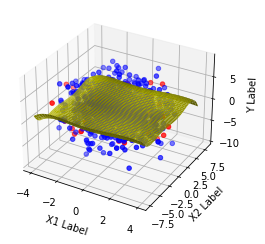

--Because of the 90-10% split, it is quite difficult to see the red points.
Nevertheless, the red points are the test data.
The blue points are the training data.
The yellow 3d surface is our 5th order model generated using the entire training set.


In [16]:
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xtrain[:,0], xtrain[:,1], ytrain, color='b')
ax.scatter(xtest[:,0], xtest[:,1], ytest, color='red')
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
ax.plot_surface(X,Y,Z, color='y')
x=np.arange(-4,4,0.05)
y=np.arange(-7.5,7.5,0.05)
X,Y=np.meshgrid(x,y)
z=np.array(polyEquation(np.ravel(X),np.ravel(Y)))
Z=z.reshape(X.shape)
plt.show()
print ("--Because of the 90-10% split, it is quite difficult to see the red points.")
print ("Nevertheless, the red points are the test data.")
print ("The blue points are the training data.")
print ("The yellow 3d surface is our 5th order model generated using the entire training set.")


Suggests that this data's origin was a random number generator, where x_1 was a random number between -4 and 4, and x_2 was a random number between -8 and 8.<br>
(y was between 9 and -10, is that significant?)